In [2]:
import pandas as pd


df1 = pd.read_csv(r"C:\Users\thoma\Documents\_FAIRALGOS\utk-fairness-analysis\predictions\20210915-143135_df_predictions_gender_ref.csv")
df2 = pd.read_csv(r"C:\Users\thoma\Documents\_FAIRALGOS\utk-fairness-analysis\predictions\20210915-133017_df_predictions_gender_ref.csv")


assert len(df1) == len(df2)

In [7]:
df_diff = pd.DataFrame(columns=['file', 'age_true', 'race_true', 'gender_true'])

for (i, row1), (_, row2) in zip(df1.iterrows(), df2.iterrows()):
    assert row1['files'] == row2['files']
    assert row1['age_true'] == row2['age_true']
    assert row1['race_true'] == row2['race_true']
    assert row1['gender_true'] == row2['gender_true']

    if(row1['gender_pred'] != row2['gender_pred']):
        df_diff = df_diff.append({'age_true': row1['age_true'], 'race_true': row1['race_true'], 'gender_true': row1['gender_true'], 'file': row1['files']}, ignore_index=True)


df_diff




,file,age_true,race_true,gender_true
0,UTKFace/25_1_2_20170104020339110.jpg.chip.jpg,25,2,1
1,UTKFace/2_1_4_20170103205101618.jpg.chip.jpg,2,4,1
2,UTKFace/1_0_2_20161219210310309.jpg.chip.jpg,1,2,0
3,UTKFace/1_1_0_20170109190937434.jpg.chip.jpg,1,0,1
4,UTKFace/7_1_1_20170113000913057.jpg.chip.jpg,7,1,1
...,...,...,...,...
534,UTKFace/8_0_0_20170104012108817.jpg.chip.jpg,8,0,0
535,UTKFace/1_0_0_20161219190621290.jpg.chip.jpg,1,0,0
536,UTKFace/35_0_1_20170116222350690.jpg.chip.jpg,35,1,0
537,UTKFace/38_0_3_20170119144055864.jpg.chip.jpg,38,3,0


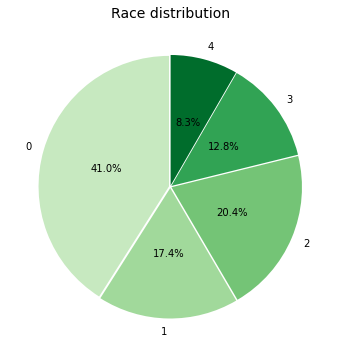

In [9]:
import matplotlib.pyplot as plt

colors = ['#edf8e9','#c7e9c0','#a1d99b','#74c476','#31a354','#006d2c']
def plot_race_distribution(df, title="Race distribution"):
    race = df['race_true']

    labels = race.value_counts().sort_index().index.tolist()
    counts = race.value_counts().sort_index().values.tolist()

    # print(labels)
    # print(counts)

    pie, ax = plt.subplots(figsize=[10,6])
    plt.pie(counts, labels=labels, autopct="%.1f%%", explode=[0.01]*5, pctdistance=0.5, colors=colors[1:], startangle=90)


    plt.title(title, fontsize=14)
    plt.show()    


plot_race_distribution(df_diff)